# 1. SETTINGS

In [1]:
!nvidia-smi

Tue Jul 23 09:09:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Pip install method (recommended)

!pip install --upgrade pip
!pip install -q torch torchvision torchaudio
!pip install -q roboflow
!pip install -q ultralytics #==8.0.196

# check package y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.9/78.2 GB disk)


In [7]:
from ultralytics import YOLO

# 2. DATASET

Create the [dataset](https://docs.ultralytics.com/datasets/detect/) directory (if it doesn't exist), where we are going to save the dataset with which we are going to train yolov8.

In [8]:
import os
#datasets_dir = os.path.join(HOME, "datasets")
#os.makedirs(datasets_dir, exist_ok=True)
#print(os.getcwd())

/content


Our dataset is from [yolo-yejbs](https://universe.roboflow.com/tfg-2nmge/yolo-yejbs/dataset/1#)

In [9]:
# Change diretory to datasets_dir
#os.chdir(datasets_dir)
#print('datasets_dir =', os.getcwd())


# Dataset import (snipet from roboflow)
from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace("tfg-2nmge").project("yolo-yejbs")
version = project.version(1)
dataset = version.download("yolov8")


datasets_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.63, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to YOLO-1 in yolov8:: 100%|██████████| 3982/3982 [00:00<00:00, 9692.55it/s] 


In [10]:
# Install pip Tree globally

!sudo apt install tree -q


!tree --dirsfirst -L 3  "/content/datasets"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123589 files and directories currently installed.)
Preparing

## Displaying some samples from the Dataset


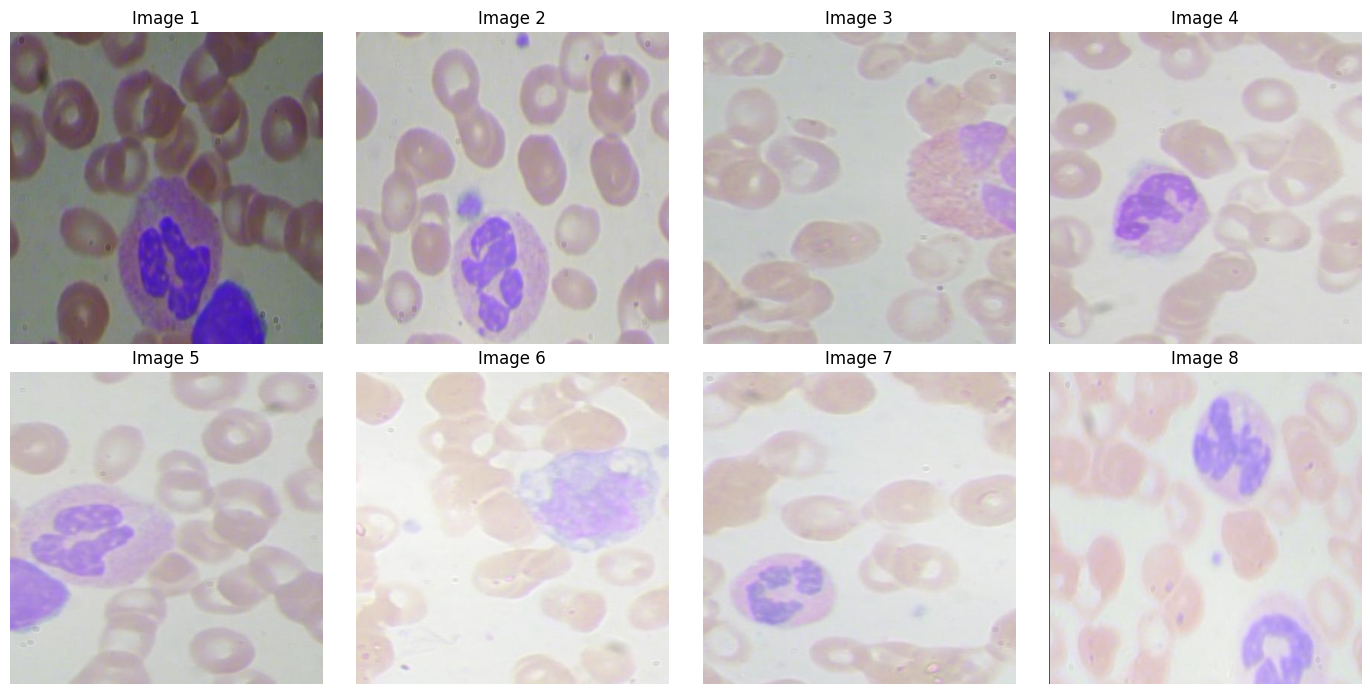

In [11]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{dataset.location}/test/images/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

To visualize a random TXT file located in the `yolo-1/test/labels`

In [12]:
import os
import random

# Path to the directory containing the TXT files
directory = f'{dataset.location}/test/labels'

# List all files in the directory
files = os.listdir(directory)

# Filter only the .txt files
txt_files = [file for file in files if file.endswith('.txt')]

# Check if there are any .txt files in the directory
if not txt_files:
    print("There are no TXT files in the directory.")
else:
    # Select a random file
    random_file = random.choice(txt_files)
    file_path = os.path.join(directory, random_file)

    # Read and display the content of the selected file
    with open(file_path, 'r') as file:
        content = file.read()
        print(f"Content of the file {random_file}:")
        print(content)


Content of the file BloodImage_00081_jpg.rf.a11ae698bccb2d53eb916c65d26ab3dc.txt:
1 0.49038461538461536 0.6322115384615384 0.1778846153846154 0.17548076923076922
1 0.6394230769230769 0.4675480769230769 0.1778846153846154 0.17548076923076922
1 0.4579326923076923 0.4567307692307692 0.20432692307692307 0.1658653846153846
1 0.08774038461538461 0.44591346153846156 0.17307692307692307 0.16826923076923078
1 0.10697115384615384 0.2439903846153846 0.21153846153846154 0.17307692307692307
1 0.22115384615384615 0.5625 0.21634615384615385 0.18509615384615385
1 0.1502403846153846 0.8798076923076923 0.21153846153846154 0.18269230769230768
1 0.6983173076923077 0.08653846153846154 0.20432692307692307 0.1658653846153846
1 0.8677884615384616 0.4110576923076923 0.20432692307692307 0.1658653846153846
1 0.2956730769230769 0.8629807692307693 0.20432692307692307 0.1658653846153846
1 0.06490384615384616 0.7560096153846154 0.12980769230769232 0.11057692307692307
1 0.921875 0.07932692307692307 0.1514423076923076

# 3. TRAIN (ULTRALYTICS YOLOV8)

In [14]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=f'{dataset.location}/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/YOLO-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/YOLO-1/train/labels... 1723 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1723/1723 [00:01<00:00, 1507.07it/s]

train: New cache created: /content/datasets/YOLO-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/YOLO-1/valid/labels... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<00:00, 872.95it/s]

val: New cache created: /content/datasets/YOLO-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.08G      1.369      1.895      1.459        216        640: 100%|██████████| 108/108 [00:49<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        175       2301      0.806       0.68       0.84       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.6G      1.213      1.097       1.32        235        640: 100%|██████████| 108/108 [00:38<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]


                   all        175       2301      0.815      0.863      0.882      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.7G        1.2      1.005      1.284        222        640: 100%|██████████| 108/108 [00:38<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        175       2301       0.81      0.899      0.894       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.49G      1.184     0.9777      1.272        232        640: 100%|██████████| 108/108 [00:38<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]


                   all        175       2301      0.786      0.897      0.908      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.7G      1.181     0.9325       1.26        215        640: 100%|██████████| 108/108 [00:42<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]


                   all        175       2301      0.824      0.878      0.903      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.62G      1.159     0.8989      1.238        218        640: 100%|██████████| 108/108 [00:36<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        175       2301       0.81      0.877      0.891      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.65G      1.153     0.8811      1.246        252        640: 100%|██████████| 108/108 [00:38<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        175       2301      0.828      0.912       0.91      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.44G      1.134     0.8546      1.229        211        640: 100%|██████████| 108/108 [00:37<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]


                   all        175       2301      0.804      0.917      0.904      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.55G      1.133      0.844      1.227        275        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        175       2301      0.854      0.879      0.912      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.49G      1.125     0.8354      1.217        229        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        175       2301      0.828       0.91      0.917      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.87G      1.133     0.8349      1.223        198        640: 100%|██████████| 108/108 [00:39<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        175       2301      0.787      0.942       0.91      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.46G      1.124     0.8205      1.223        218        640: 100%|██████████| 108/108 [00:37<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        175       2301      0.828      0.885      0.911      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.49G      1.107     0.8118      1.209        266        640: 100%|██████████| 108/108 [00:36<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        175       2301      0.839      0.869      0.908      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.57G      1.111     0.8045      1.216        215        640: 100%|██████████| 108/108 [00:37<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        175       2301      0.848      0.914      0.924       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.53G      1.108     0.7983      1.209        226        640: 100%|██████████| 108/108 [00:36<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        175       2301       0.85      0.875      0.909      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.54G        1.1     0.7908      1.206        203        640: 100%|██████████| 108/108 [00:37<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]


                   all        175       2301      0.851      0.915      0.924      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.54G      1.087     0.7803        1.2        214        640: 100%|██████████| 108/108 [00:41<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        175       2301      0.843      0.919      0.913      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.54G      1.086     0.7717      1.196        166        640: 100%|██████████| 108/108 [00:37<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        175       2301      0.848      0.899       0.91      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.52G      1.075     0.7623      1.195        241        640: 100%|██████████| 108/108 [00:37<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        175       2301      0.857      0.899      0.917      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.44G       1.08     0.7623      1.201        267        640: 100%|██████████| 108/108 [00:36<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        175       2301      0.861      0.897      0.926      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.37G      1.074     0.7533      1.191        197        640: 100%|██████████| 108/108 [00:37<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]


                   all        175       2301      0.851      0.905      0.923      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G      1.074     0.7473      1.188        245        640: 100%|██████████| 108/108 [00:38<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        175       2301      0.845       0.88      0.924      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.32G      1.069     0.7387      1.191        236        640: 100%|██████████| 108/108 [00:37<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]


                   all        175       2301      0.849      0.908      0.919      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.79G      1.062     0.7423      1.193        179        640: 100%|██████████| 108/108 [00:40<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]


                   all        175       2301      0.843      0.922      0.928      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.41G      1.055     0.7364       1.18        279        640: 100%|██████████| 108/108 [00:38<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        175       2301      0.868      0.895      0.925      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.66G       1.05     0.7306      1.174        155        640: 100%|██████████| 108/108 [00:37<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        175       2301      0.868      0.894      0.933      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.6G      1.052     0.7306      1.177        244        640: 100%|██████████| 108/108 [00:43<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        175       2301      0.868      0.888      0.927      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.54G      1.055     0.7316      1.179        226        640: 100%|██████████| 108/108 [00:37<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        175       2301      0.836      0.921      0.922      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.83G      1.052     0.7213      1.175        311        640: 100%|██████████| 108/108 [00:37<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        175       2301       0.85      0.899      0.925      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.41G      1.052     0.7192      1.174        281        640: 100%|██████████| 108/108 [00:38<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        175       2301      0.861      0.917      0.934      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.65G      1.034     0.7104      1.171        206        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        175       2301      0.852      0.922      0.929       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.39G      1.039     0.7022      1.172        239        640: 100%|██████████| 108/108 [00:36<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        175       2301       0.85       0.91      0.926      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.52G      1.034     0.6979      1.173        297        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        175       2301      0.854      0.906      0.931      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.59G      1.022     0.6944       1.16        167        640: 100%|██████████| 108/108 [00:34<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        175       2301      0.853       0.89      0.924       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.35G      1.025     0.6973      1.165        262        640: 100%|██████████| 108/108 [00:34<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        175       2301      0.842      0.918      0.924      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.69G      1.017     0.6802      1.159        198        640: 100%|██████████| 108/108 [00:40<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        175       2301      0.868      0.911       0.93      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.46G      1.013     0.6829      1.155        217        640: 100%|██████████| 108/108 [00:35<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        175       2301      0.866      0.924      0.933      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.6G      1.016      0.681      1.158        241        640: 100%|██████████| 108/108 [00:34<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        175       2301      0.858       0.91      0.929      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.53G      1.007     0.6761      1.153        153        640: 100%|██████████| 108/108 [00:34<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        175       2301       0.86      0.917      0.943      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.65G      1.012     0.6743      1.154        284        640: 100%|██████████| 108/108 [00:34<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        175       2301      0.864      0.908      0.935      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.32G      1.006     0.6643      1.152        267        640: 100%|██████████| 108/108 [00:35<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]

                   all        175       2301      0.869      0.915      0.937      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.41G     0.9974     0.6657       1.15        188        640: 100%|██████████| 108/108 [00:38<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        175       2301      0.872       0.91      0.935      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.57G     0.9993     0.6703       1.15        259        640: 100%|██████████| 108/108 [00:36<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        175       2301      0.876      0.917      0.942      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.54G     0.9825     0.6532      1.141        194        640: 100%|██████████| 108/108 [00:35<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        175       2301       0.87       0.91      0.931      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.69G     0.9866     0.6533      1.141        188        640: 100%|██████████| 108/108 [00:36<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        175       2301      0.859      0.893      0.925      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.77G     0.9712     0.6388      1.135        239        640: 100%|██████████| 108/108 [00:36<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        175       2301      0.891      0.887      0.939      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.57G      0.983     0.6499      1.142        220        640: 100%|██████████| 108/108 [00:37<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


                   all        175       2301      0.859       0.92      0.937       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.64G     0.9741     0.6476      1.139        305        640: 100%|██████████| 108/108 [00:39<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        175       2301      0.866      0.909      0.935      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.57G     0.9745     0.6471      1.138        191        640: 100%|██████████| 108/108 [00:36<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        175       2301      0.885      0.906      0.937      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.47G     0.9641     0.6378      1.126        268        640: 100%|██████████| 108/108 [00:35<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        175       2301      0.859      0.933      0.937      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.7G     0.9692     0.6324      1.132        292        640: 100%|██████████| 108/108 [00:35<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        175       2301      0.878      0.913      0.935      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.46G     0.9539     0.6236      1.124        327        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        175       2301       0.88       0.92      0.943      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.9647     0.6277       1.13        198        640: 100%|██████████| 108/108 [00:35<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        175       2301      0.852      0.946      0.937      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.57G     0.9497     0.6171      1.124        193        640: 100%|██████████| 108/108 [00:36<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        175       2301      0.877      0.937       0.95      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.69G     0.9494     0.6212      1.122        304        640: 100%|██████████| 108/108 [00:35<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        175       2301      0.876      0.925      0.933      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.71G     0.9479      0.614      1.116        245        640: 100%|██████████| 108/108 [00:35<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        175       2301      0.868      0.915      0.932      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.49G     0.9405     0.6176      1.124        208        640: 100%|██████████| 108/108 [00:35<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        175       2301      0.892      0.907      0.944      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.51G     0.9419     0.6049      1.115        252        640: 100%|██████████| 108/108 [00:35<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        175       2301      0.884      0.921      0.947      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.6G     0.9364     0.5986      1.117        259        640: 100%|██████████| 108/108 [00:35<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        175       2301      0.889      0.906      0.942      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.55G     0.9288      0.588      1.108        272        640: 100%|██████████| 108/108 [00:41<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        175       2301      0.886      0.932      0.945      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.87G     0.9229     0.5919      1.102        247        640: 100%|██████████| 108/108 [00:35<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        175       2301       0.89      0.918      0.944      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.65G       0.92     0.5937      1.107        248        640: 100%|██████████| 108/108 [00:35<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        175       2301      0.901      0.917      0.948      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.68G     0.9207      0.596      1.106        212        640: 100%|██████████| 108/108 [00:35<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        175       2301      0.884      0.926      0.951      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.49G     0.9169      0.586      1.103        255        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        175       2301      0.888      0.935       0.95       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.51G     0.9072     0.5793      1.101        207        640: 100%|██████████| 108/108 [00:37<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        175       2301      0.862      0.929       0.94      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G      0.905      0.581      1.089        205        640: 100%|██████████| 108/108 [00:42<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]


                   all        175       2301      0.883       0.94      0.948      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.53G     0.9026     0.5771      1.089        217        640: 100%|██████████| 108/108 [00:38<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]


                   all        175       2301      0.875      0.937      0.943       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.64G     0.9037     0.5784      1.099        171        640: 100%|██████████| 108/108 [00:36<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        175       2301      0.875      0.939      0.941      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.36G     0.8986     0.5697      1.092        255        640: 100%|██████████| 108/108 [00:35<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        175       2301      0.884      0.933      0.936      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.32G     0.9007     0.5773      1.098        165        640: 100%|██████████| 108/108 [00:35<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        175       2301       0.88      0.912       0.94      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.62G      0.892     0.5633      1.089        199        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        175       2301      0.901      0.915      0.948      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.7G     0.8926     0.5662      1.088        257        640: 100%|██████████| 108/108 [00:38<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        175       2301      0.909      0.922      0.945      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.5G     0.8829     0.5604      1.086        237        640: 100%|██████████| 108/108 [00:35<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        175       2301      0.886      0.935      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.49G     0.8876     0.5566      1.085        228        640: 100%|██████████| 108/108 [00:34<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        175       2301      0.886      0.936      0.946      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.44G     0.8784     0.5544       1.08        166        640: 100%|██████████| 108/108 [00:35<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        175       2301      0.897       0.93      0.947      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.51G     0.8727     0.5474      1.076        242        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        175       2301      0.902       0.93      0.949      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.32G     0.8691     0.5459      1.077        282        640: 100%|██████████| 108/108 [00:36<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        175       2301      0.899      0.931       0.95      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.58G     0.8735     0.5463      1.084        198        640: 100%|██████████| 108/108 [00:40<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        175       2301      0.908      0.906      0.944      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.49G     0.8664     0.5429      1.076        207        640: 100%|██████████| 108/108 [00:35<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        175       2301      0.878      0.946      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.68G     0.8681     0.5377      1.071        264        640: 100%|██████████| 108/108 [00:35<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        175       2301      0.899       0.93      0.947      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.71G     0.8646     0.5353      1.071        182        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        175       2301      0.898      0.932      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.54G     0.8568     0.5378      1.079        228        640: 100%|██████████| 108/108 [00:35<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        175       2301      0.903      0.936      0.944      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.5G      0.853     0.5328      1.072        295        640: 100%|██████████| 108/108 [00:35<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        175       2301      0.904      0.938      0.948       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.52G     0.8592     0.5314      1.069        279        640: 100%|██████████| 108/108 [00:39<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        175       2301       0.91      0.926      0.949      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.36G     0.8466     0.5244      1.069        217        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        175       2301      0.901       0.93      0.947      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.45G      0.852      0.528       1.07        249        640: 100%|██████████| 108/108 [00:38<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        175       2301      0.902      0.937      0.946      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.63G     0.8424     0.5218      1.063        209        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]


                   all        175       2301      0.909      0.926       0.95      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.62G     0.8407      0.523      1.065        210        640: 100%|██████████| 108/108 [00:37<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        175       2301      0.902      0.945      0.948      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.66G     0.8373      0.519      1.062        254        640: 100%|██████████| 108/108 [00:37<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        175       2301      0.904      0.937       0.95      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.71G     0.8385     0.5168      1.062        250        640: 100%|██████████| 108/108 [00:42<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        175       2301      0.907      0.933      0.949      0.696


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.61G     0.8252     0.4833      1.074        175        640: 100%|██████████| 108/108 [00:40<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]


                   all        175       2301      0.901      0.939      0.952      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.2G     0.7955     0.4583      1.064        149        640: 100%|██████████| 108/108 [00:36<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all        175       2301      0.904      0.937      0.949      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.16G     0.7857     0.4527      1.057        132        640: 100%|██████████| 108/108 [00:36<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        175       2301      0.911      0.927      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.16G     0.7842     0.4488      1.053        142        640: 100%|██████████| 108/108 [00:36<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        175       2301      0.893      0.946      0.953      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.16G     0.7794     0.4445      1.051        119        640: 100%|██████████| 108/108 [00:34<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        175       2301        0.9      0.941      0.952      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.21G     0.7788      0.442      1.052        133        640: 100%|██████████| 108/108 [00:39<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        175       2301      0.904      0.938      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.18G      0.775     0.4392       1.05        121        640: 100%|██████████| 108/108 [00:33<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        175       2301      0.893      0.949      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.16G     0.7699     0.4371      1.048        125        640: 100%|██████████| 108/108 [00:31<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        175       2301      0.906      0.939      0.953      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.16G     0.7658     0.4332      1.043        132        640: 100%|██████████| 108/108 [00:33<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        175       2301      0.907      0.937      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.18G     0.7579     0.4286      1.035        134        640: 100%|██████████| 108/108 [00:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        175       2301      0.912      0.932      0.953      0.712



100 epochs completed in 1.137 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.45s/it]


                   all        175       2301      0.911      0.933      0.953      0.712
             Platelets         94        173      0.901      0.954      0.958      0.564
                   RBC        164       1947      0.849      0.845      0.909      0.694
                   WBC        174        181      0.983          1      0.993      0.877
Speed: 0.5ms preprocess, 7.5ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to runs/detect/train2
